# Programming for Data Science

# Programming Task 2

### Requirement FR6 - Read CSV data from two files and merge it into a single Data Frame 
### Description: For this task you should use the task2a.csv and task2b.csv data files.

In [1]:
# Import the pandas library 
import pandas as pd

# Read csv files using pandas and store them in dataframes
data1 = pd.read_csv ("task2a.csv")
data2 = pd.read_csv ("task2b.csv")

# Merging dataframes using the merge function with two common columns
full_dataset = pd.merge (data1, data2, on=["Entity", "Year"], how="outer")

# Print the first few rows of the merged dataset for inspection
print (full_dataset.head())

        Entity  Year  Schizophrenia (%)  Bipolar disorder (%)  \
0  Afghanistan  1990           0.160560              0.697779   
1  Afghanistan  1991           0.160312              0.697961   
2  Afghanistan  1992           0.160135              0.698107   
3  Afghanistan  1993           0.160037              0.698257   
4  Afghanistan  1994           0.160022              0.698469   

   Eating disorders (%)  Anxiety disorders (%)  Depression (%)  \
0              0.101855               4.828830        4.071831   
1              0.099313               4.829740        4.079531   
2              0.096692               4.831108        4.088358   
3              0.094336               4.830864        4.096190   
4              0.092439               4.829423        4.099582   

   Drug use disorders (%)  Alcohol use disorders (%)  
0                1.677082                   0.672404  
1                1.684746                   0.671768  
2                1.694334                   0.6

### Requirement FR7 - Explore the dataset to identify an "interesting" pattern or trend
### Description: Use an appropriate visualisation tool (such as Matplotlib or Seaborn) to illustrate your exploration. You should include at least three visualisations as part of your exploration. You could consider other ways to explore the data such as data summaries or transformations. You must include an explanation of the dataset exploration, your selected "interesting" pattern or trend and your reasons for selecting it.

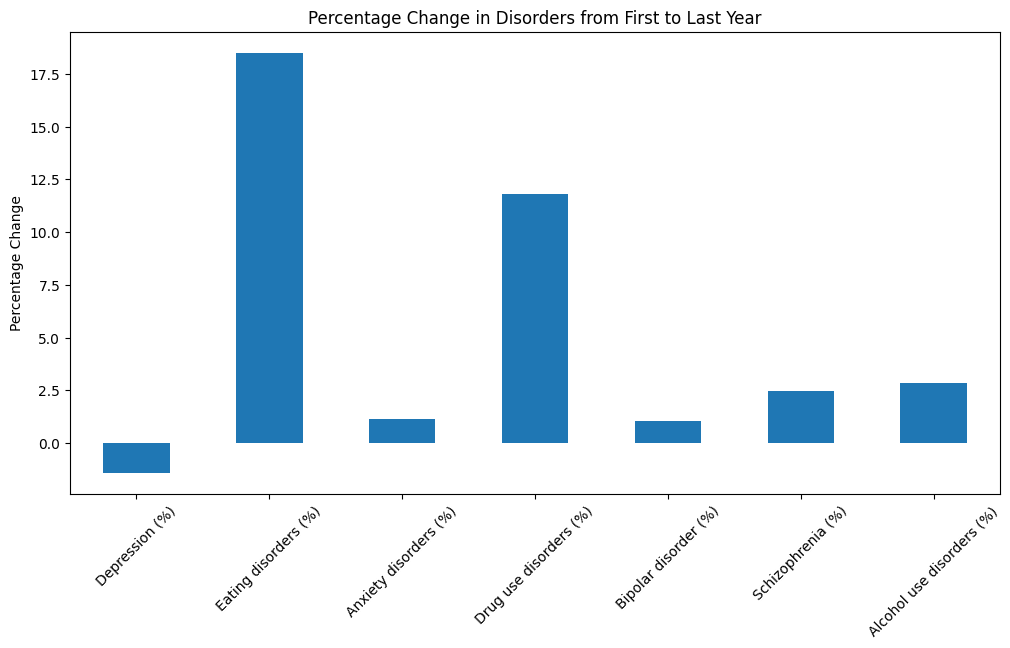

In [2]:
# Method 1) Search for the biggest changes over the years

# Import matplotlib.pyplot and seaborn libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of seven disorders in the dataset
disorder_list = ["Depression (%)", "Eating disorders (%)", "Anxiety disorders (%)", "Drug use disorders (%)",
                 "Bipolar disorder (%)", "Schizophrenia (%)", "Alcohol use disorders (%)"]

# Group the dataset by "Year" and calculate the mean for each disorder in 'disorder_list'
averages = full_dataset.groupby("Year")[disorder_list].mean()

# Get the values for the first year in the dataset (the first row of the grouped averages)
first_year = averages.head(1).values[0]

# Get the values for the last year in the dataset (the last row of the grouped averages)
last_year = averages.tail(1).values[0]

# Calculate the percentage change for each disorder from the first to the last year
percentage_change = (last_year-first_year)/first_year*100

# Convert the percentage change array into a pandas Series for easier plotting
percentage_change_series = pd.Series(data=percentage_change, index=averages.columns)

# Set up the figure size for the plot
plt.figure (figsize=(12,6))

# Plot the "percentage change series" as a bar chart
percentage_change_series.plot (kind="bar")

# Setting the title
plt.title("Percentage Change in Disorders from First to Last Year")

# Setting labels for X and Y axis
plt.xlabel("")
plt.ylabel("Percentage Change")

# Rotate the x-axis labels (disorder names) by 45 degrees for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Interpretation: Eating disorders have the highest percentage of growth over the years by a large margin compared to other disorders. This increasing trend was selected as an interesting trend due to its significant rise over the years, indicating a growing health concern. 

strong correlation between Eating disorders (%) and Anxiety disorders (%): 0.698
strong correlation between Eating disorders (%) and Bipolar disorder (%): 0.708
strong correlation between Eating disorders (%) and Schizophrenia (%): 0.669
strong correlation between Anxiety disorders (%) and Drug use disorders (%): 0.616
strong correlation between Anxiety disorders (%) and Bipolar disorder (%): 0.664


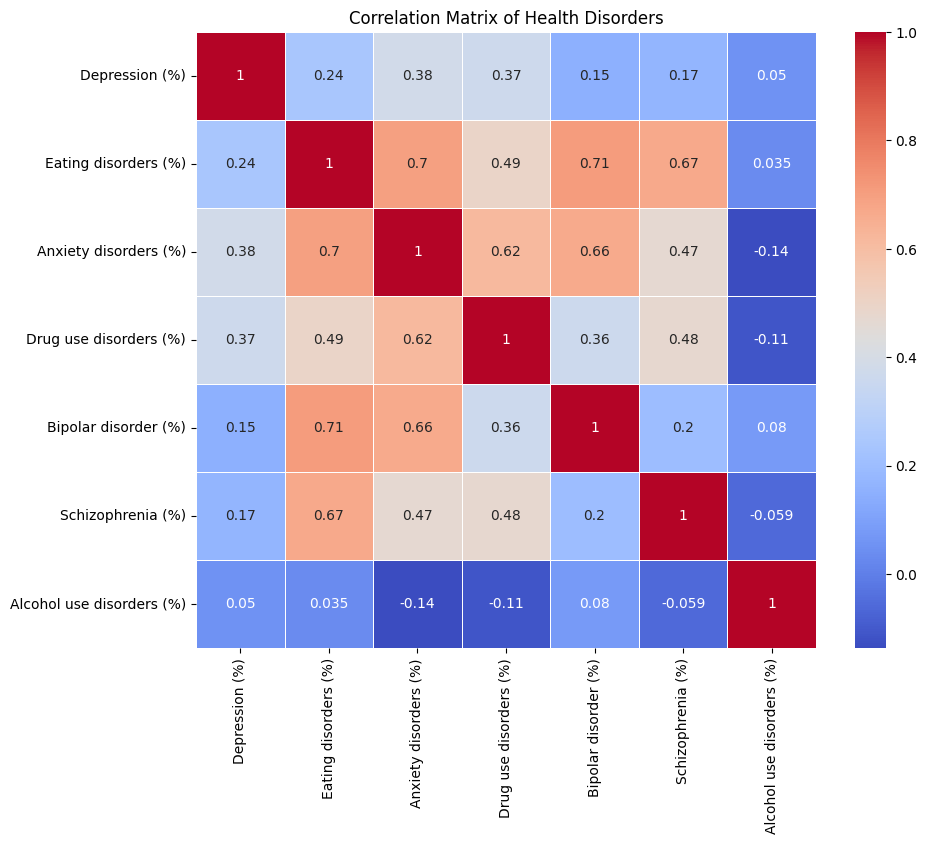

In [3]:
# Method 2) Search for strong correlation coefficients between disorders

# use nested loops to make pair of disorders
for i in range(len(disorder_list)):
    for j in range(i+1 , len(disorder_list)):
        disorder1 = disorder_list[i]
        disorder2 = disorder_list[j]

        # calculate corellation coefficients of disorder pairs
        corr_coefficient = round(full_dataset[disorder1].corr(full_dataset[disorder2]),3)

        # find strong correlations between disorders
        if abs(corr_coefficient) > 0.6:
            print (f"strong correlation between {disorder1} and {disorder2}: {corr_coefficient}")

# corralation heatmap
corr_matrix = full_dataset[disorder_list].corr()
plt.figure(figsize=(10,8))
plt.title("Correlation Matrix of Health Disorders")
sns.heatmap(corr_matrix, annot=True, cmap= "coolwarm", linewidths=0.5)
plt.show()

Interpretation: The heatmap illustrates the relationships between various disorders. Based on both heatmap and filtered strong correlations, eating disorders are strongly correlated with Schizophrenia, Bipolar Disorder, and Anxiety Disorders. These correlations indicate that the rise in Eating Disorders might reflect broader trends in mental health and societal factors. Additionally, the moderate correlation with drug use disorders suggests a possible contribution of drug use to the prevalence of eating disorders.

Descriptive Statistics:

        Depression (%)  Eating disorders (%)  Anxiety disorders (%)  \
count     6468.000000           6468.000000            6468.000000   
mean         3.497654              0.239998               3.989921   
std          0.655859              0.158141               1.167526   
min          2.139903              0.073908               2.023393   
25%          3.005529              0.122387               3.188824   
50%          3.499606              0.182525               3.554373   
75%          3.912381              0.292666               4.682163   
max          6.602754              0.943991               8.967330   

       Drug use disorders (%)  Bipolar disorder (%)  Schizophrenia (%)  \
count             6468.000000           6468.000000        6468.000000   
mean                 0.862278              0.719145           0.211644   
std                  0.460679              0.171589           0.044253   
min                  0.383650              0.31

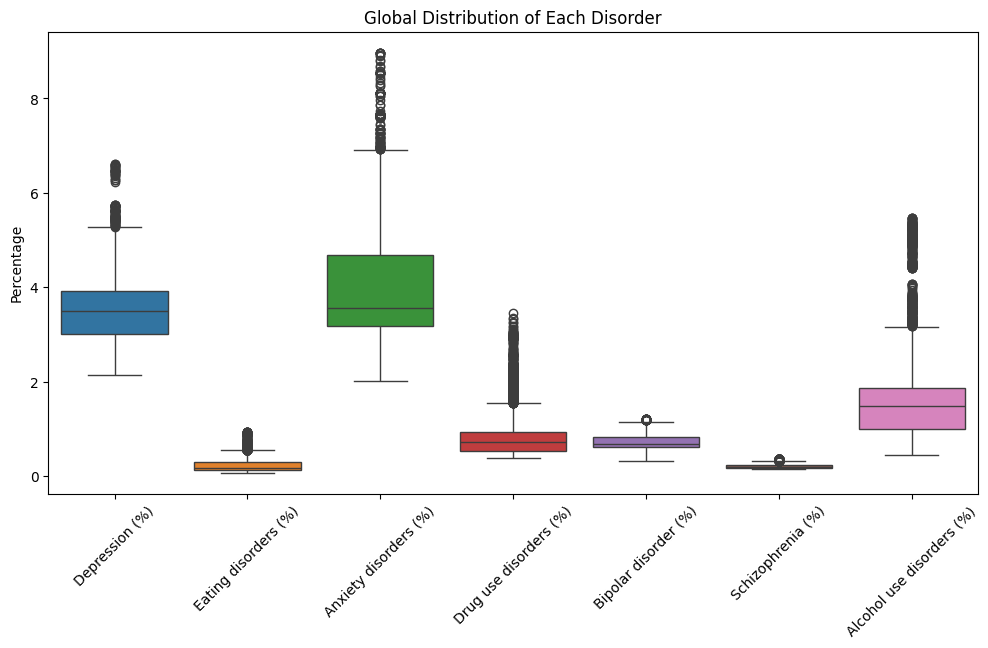

In [4]:
# Method 3) Summarize data on disorders

# Generate descriptive statistics for disorders in the dataset
summary = full_dataset[disorder_list].describe()
print (f"Descriptive Statistics:\n\n {summary}")

# Method 4) Use boxplots for global distribution of each disorder

# Set up the figure size for the plot
plt.figure (figsize=(12,6))

# Create a boxplot for the disorders in "disorder_list"
sns.boxplot(data=full_dataset[disorder_list])

# Setting the title
plt.title("Global Distribution of Each Disorder")

# Setting labels for Y axis
plt.ylabel("Percentage")

# Rotate the x-axis labels (disorder names) by 45 degrees for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

Interpretation: A low standard deviation indicates that the percentages of eating disorders are relatively consistent across different countries and years in the dataset. This consistency is further evidenced by the boxplots, which show a tighter distribution for eating disorders compared to most other disorders. It highlights the potential uniformity in their impact across different regions and times, potentially making it easier to plan and allocate resources for treatment and prevention.

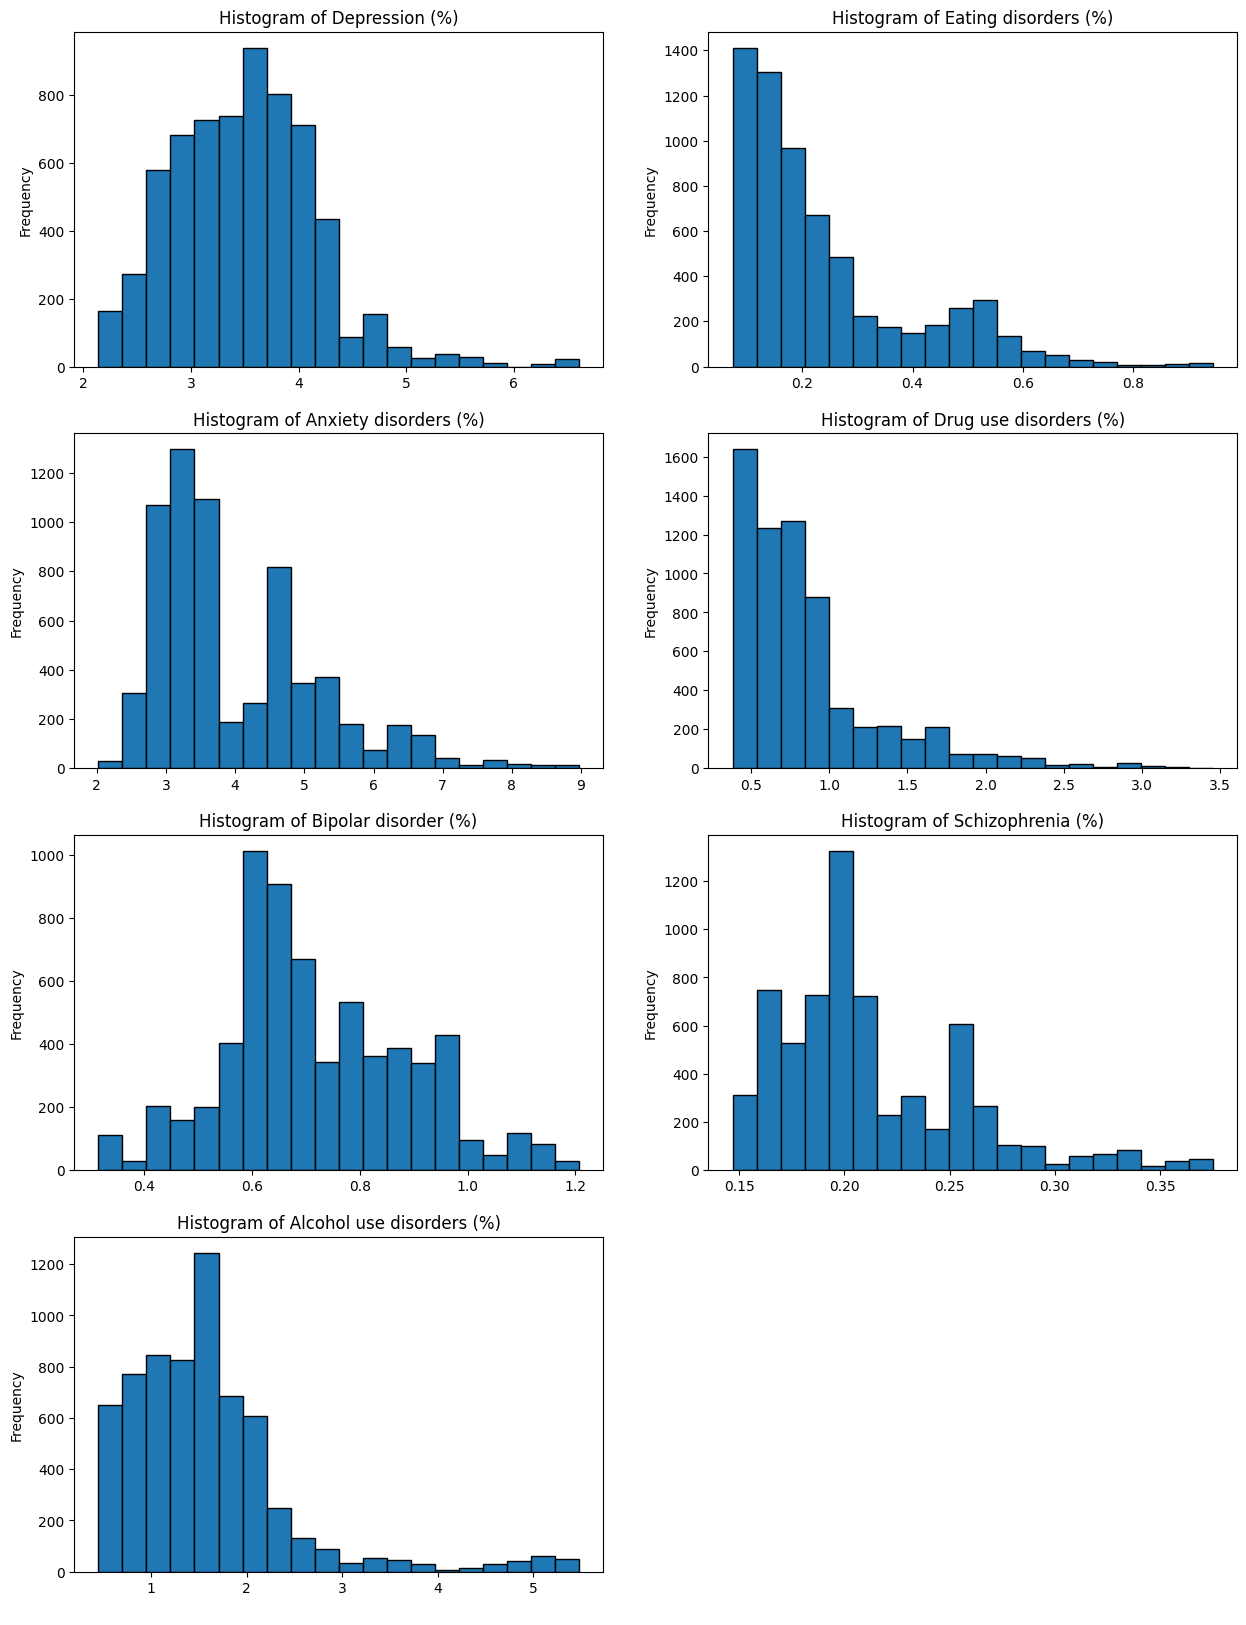

In [5]:
# Method 5) Compare histograms for disorders

# Set up the figure size for multiple subplots
plt.figure(figsize=(15,20))

# Loop through each disorder in "disorder_list"
for i, disorder in enumerate(disorder_list, 1):

    # For each disorder, create a subplot in a 4x2 grid, "i" specifies the position of the subplot in the grid
    plt.subplot(4,2,i)

    # Create a histogram for the current disorder
    plt.hist(full_dataset[disorder], bins=20, edgecolor="black")

    # Set the title of each histogram 
    plt.title(f"Histogram of {disorder}")

    # Setting labels for X and Y axis
    plt.xlabel(" ")
    plt.ylabel("Frequency")

# Display all the subplots
plt.show()

Interpretation: The histogram for eating disorders is relatively narrow and centered around a specific range of values. This suggests that the percentage of eating disorders is relatively consistent across the dataset. It confirms that the standard deviation for eating disorders is indeed low, as previously noted. there is no long bar far from the central group which makes the existence of outliers less likely.

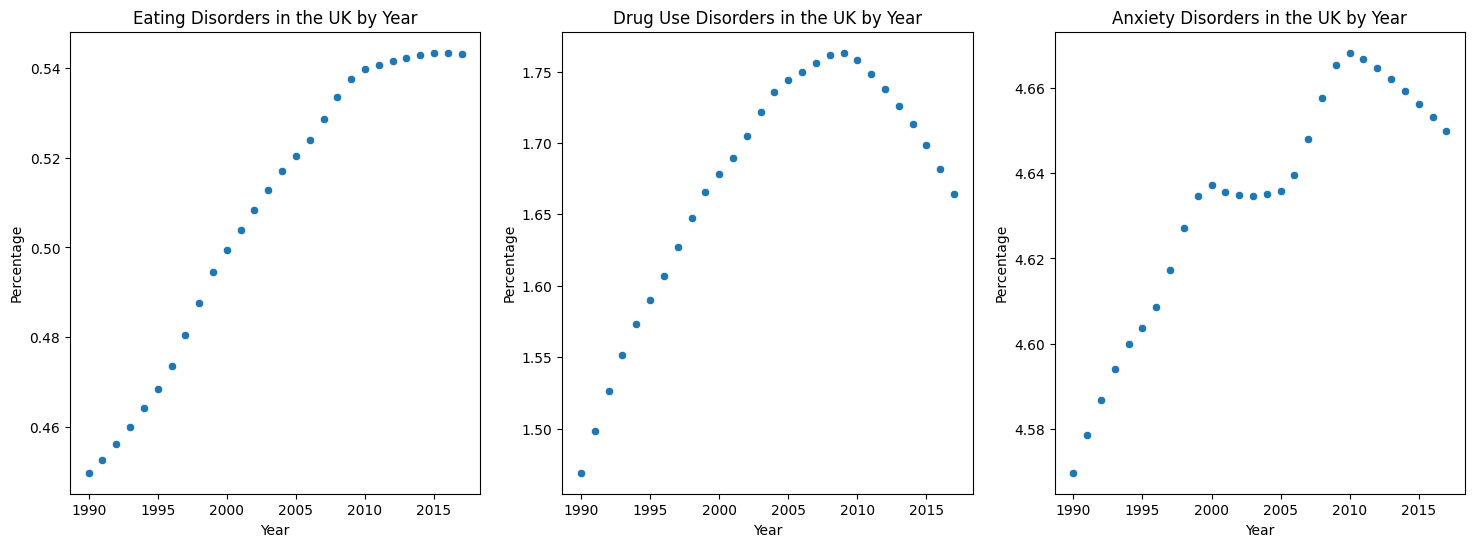

In [6]:
# Method 6) compare scatter plots of Eating, Drug Use, and Anxiety Disorders in the UK by Year

# Filter the data for only the United Kingdom
UK_data = full_dataset[full_dataset["Entity"] == "United Kingdom"]

# Set up the figure size for multiple subplots
plt.figure(figsize=(18, 6))

# Scatter plot for Eating Disorders in the UK by Year
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.scatterplot(x="Year", y="Eating disorders (%)", data=UK_data)
plt.title("Eating Disorders in the UK by Year")
plt.xlabel("Year")
plt.ylabel("Percentage")

# Scatter plot for Drug Use Disorders in the UK by Year
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.scatterplot(x="Year", y="Drug use disorders (%)", data=UK_data)
plt.title("Drug Use Disorders in the UK by Year")
plt.xlabel("Year")
plt.ylabel("Percentage")

# Scatter plot for Anxiety Disorders in the UK by Year
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.scatterplot(x="Year", y="Anxiety disorders (%)", data=UK_data)
plt.title("Anxiety Disorders in the UK by Year")
plt.xlabel("Year")
plt.ylabel("Percentage")

# Show the combined figure
plt.show()

Interpretation: The trends up to 2010 showed an increase in all three disorders in the UK, but after 2010, eating disorders stabilized while drug use and anxiety disorders began to decrease. Given the correlations we've seen, these issues may influence each other. For instance, drug use might have contributed to the initial rise in eating and anxiety disorders. The drop in drug and anxiety problems could be because of special efforts to help with these issues but eating disorders did not change much, maybe because they are affected by different factors.

Conclusion: Eating disorders showed the biggest increase over time, marking it as a significant health concern. Strong correlations were identified between eating disorders and other mental issues like anxiety, suggesting interlinked mental health and societal issues. The consistency in eating disorder percentages across countries and years, as evidenced by low standard deviation and uniform histograms, points to a widespread, uniform impact, useful for planning treatments. Interestingly, in the UK, while eating disorders stabilized post-2010, drug use and anxiety disorders declined, indicating possible interplay among these disorders and the effectiveness of targeted health interventions.

### Requirement FR8 - Detect and remove any outliers in the data used for your "interesting" pattern or trend
### Description: Using an appropriate technique to detect and remove any outliers in the data used for your "interesting" pattern or trend. You must include an explanation of the detection method used, how it works, and the any outliers detected. 

There are several methods for detecting and removing outliers. I chose the Interquartile Range (IQR) for its simplicity, clarity, and robustness to extreme values. It does not assume a normal distribution of data, making it suitable for a wide range of datasets, including those with skewed distributions. IQR measures the middle 50% of the data and is used to determine the variability of the dataset. This range covers the central portion of the data, effectively ignoring the extreme highest and lowest values.

number of outliers detected: 370
number of observations before removing outliers: 6468
number of observations after removing outliers: 6098


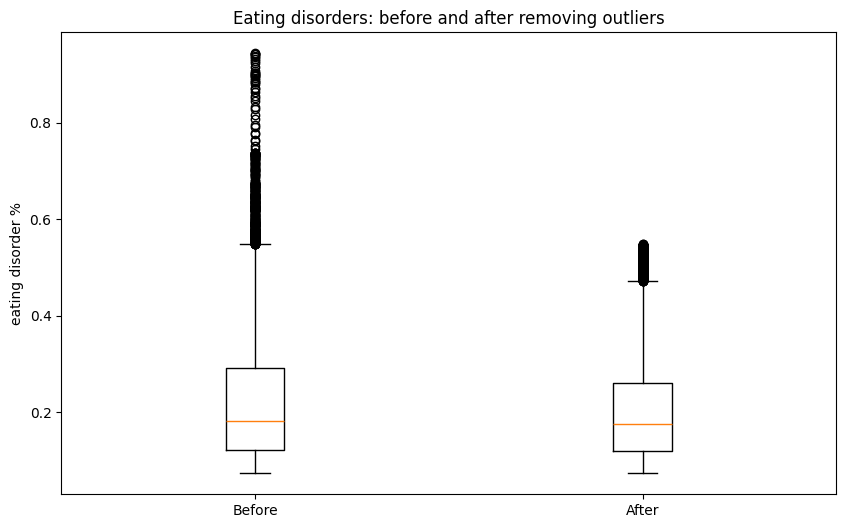

In [7]:
# Use IQR method to remove outliers

# Calculate the first (Q1) and third (Q3) quartiles for "Eating disorders (%)" in the dataset
Q1 = full_dataset["Eating disorders (%)"].quantile(0.25)
Q3 = full_dataset["Eating disorders (%)"].quantile(0.75)

# Calculate the IQR, which is the range between the first and third quartiles
IQR = Q3 - Q1

# Determine the lower limit, Any data point below this limit is considered an low outlier
lower_limit = Q1 - 1.5 * IQR

# Determine the upper limit, Any data point above this limit is considered an high outlier
upper_limit = Q3 + 1.5 * IQR

# Filter the dataset to remove outliers
cleaned_data = full_dataset[(full_dataset["Eating disorders (%)"] >= lower_limit) & (full_dataset["Eating disorders (%)"] <= upper_limit)]

# Boxplots before and after filtering outliers
plt.figure(figsize=(10,6))
plt.boxplot([full_dataset["Eating disorders (%)"], cleaned_data["Eating disorders (%)"]], labels= ["Before", "After"])
plt.title("Eating disorders: before and after removing outliers")
plt.ylabel("eating disorder %")

# Print number of outliers
print ("number of outliers detected:", len(full_dataset["Eating disorders (%)"])-len(cleaned_data["Eating disorders (%)"]))
print ("number of observations before removing outliers:", len(full_dataset["Eating disorders (%)"]))
print ("number of observations after removing outliers:", len(cleaned_data["Eating disorders (%)"]))

Interpretation: The post-IQR boxplot reveals a narrower distribution, indicating successful outlier removal without significantly affecting the overall trend or central tendency, as only 5.7% of the data were outliers. The median's consistency across both plots confirms that outliers did not skew the central tendency. Some data points remain outside the upper whisker, indicating they are still considered outliers but are not extreme enough to be removed by the 1.5 * IQR criterion.

### Requirement FR9 - Define a hypothesis to test your “interesting” pattern or trend

Null Hypothesis (H0): There has been no significant change in the prevalence of eating disorders over the years in the dataset.


Alternative Hypothesis (H1): There has been a significant increase in the prevalence of eating disorders over the years in the dataset.

Null Hypothesis serves as a baseline, positing that any observed changes in prevalence rates are due to random chance rather than an actual trend. Alternative Hypothesis represents the idea that the observed changes in the dataset are not random but indicate a real, underlying trend.

With these hypotheses, I aim to use statistical methods to determine which one is supported by the data. If the data provides sufficient evidence against the null hypothesis, we can accept the alternative hypothesis, indicating that the observed trend is significant.

### Requirement FR10 - Test your hypothesis with statistical significance level of 0.05

The Pearson correlation test measures the strength and direction of a linear relationship between two continuous variables. It helps determine whether there is a linear correlation between the year and the prevalence of eating disorders. The p-value indicates the probability of observing the data if the null hypothesis is true. If the p-value is less than 0.05, it suggests that the observed correlation is statistically significant.

In [8]:
# Import the stats module from the scipy library
from scipy import stats

# Perform Pearson correlation to test the relationship between year and eating disorders prevalence
corr_coef, p_value = stats.pearsonr(cleaned_data["Year"], cleaned_data["Eating disorders (%)"])

# Printing the results
print("Results of Hypothesis Testing:", "\n" "Correlation Coefficient:", round(corr_coef,4), "\n" "P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print(f"Since the p-value ({p_value}) is less than 0.05, we reject the null hypothesis.")
    print("There is a significant linear relationship between year and the prevalence of eating disorders.")
else:
    print(f"Since the p-value ({p_value}) is greater than 0.05, we do not reject the null hypothesis.")
    print("There is no significant linear relationship between year and the prevalence of eating disorders.")

Results of Hypothesis Testing: 
Correlation Coefficient: 0.0485 
P-value: 0.00015001794221751517
Since the p-value (0.00015001794221751517) is less than 0.05, we reject the null hypothesis.
There is a significant linear relationship between year and the prevalence of eating disorders.
